# Prüfung
 bei Antworten an prüfung - nicht nur einfach 'Nullhypothese verworfen, sondern auch was es genau bedeuted'

# Vorhersage von Zeitreihen

Im Kapitel _Einführung in Zeitreihen_ haben wir verschiedene Beispiele von Zeitreihen untersucht, die aus der Oekonomie, Ingenieur- und Umweltwissenschaften stammen. Wir haben dort verschiedene Visualisierungs- und Verdichtungstechniken, sowie die Zerlegung einer Zeitreihe kennengelernt.

Im letzten Kapitel lernten wir das stochastische Grundgerüst von Zeitreihen kennen: (diskrete) stochastische Prozesse. Autokovarianz und -korrelation wurden als informative Quantitäten eines gegebenen Prozesse eingeführt, und wir haben gelernt, wie man diese aus den Daten schätzt, sofern der zugrundeliegende Prozess (schwach) stationär ist.

Nun wollen wir schliesslich untersuchen, wie eine Modellierung einer Zeitreihe mit einem geeigneten stochastischen Prozess verwendet werden kann, um zukünftige und nichtbeobachtete Daten _vorherzusagen_.


Anders ausgedrückt ist es das Ziel dieses Kapitels, zukünfige Werte $ x_{n+k} $ für $ k=1,2,\ldots $ vorherzusagen, falls $\{x_1,\dots, x_n\}$ bis zur jetzigen Zeit bekannt sind. Im Wesentlichen müssen wir drei Schritte nacheinander durchführen, um dieses Ziel zu erreichen:

(i) Wir müssen sicher sein, dass der zugrundeliegende Prozess vorhersagbar ist. Das heisst, in der Zukunft ändert sich der Prozess nicht dramatisch, sondern fährt so weiter wie bisher (im probalistischen Sinn).

(ii) Wir wählen eine Modellklasse durch explorative Datenanalyse einer gegebenen Zeitreihe. Danach passen wir das Modell an Trainingsdaten an und erhalten die Modellparameter, die das angepasste Modell vollumfänglich beschreiben. 

(iii) Mit dem angepassten Modell sagen wir zukünftige Werte des Prozesses voraus.

Wir fokusieren uns auf die einfachsten und doch wichtigsten 
parametrischen Modelle für stationäre parametrische Prozesse: _autoregressive Modelle_.

# Autoregressive Modelle AR(p)

Autoregressive Modelle basieren auf der Idee, dass der momentane 
Wert einer Zeitreihe durch eine Linearkombination der $ p $ 
vorhergehenden Wert erklärt werden kann.

Das autoregressive Modell der Ordnung  $p$ ist ein diskreter stochastischer Prozess, der folgender Gleichung genügt 

$$
X_n 
= a_1 X_{n-1} + a_2 X_{n-2} + \dots + a_p X_{n-p} + W_n
$$

wobei $a_1,a_2,\dots, a_n$ die Modellparameter sind und  $W_1,W_2,\dots$  ein Prozess des weissen Rauschens mit Varianz $\sigma^2$ ist.



Autoregressive Modelle werden ausschliesslich für die Modellierung von stationären Prozessen verwendet.

### Beispiel : $\text{AR}(1)$ Prozess

$$ X_n = a_1 X_{n-1} + W_n $$

Random Walk ist vorheriger Tag + Rauschen

Wir berechnen zuerst den Erwartungswert des Prozesses, indem wir die Erwartung auf beiden 
Seiten der Gleichung nehmen: 

$$ \mu = E(X_n) = a_1 E(X_{n-1}) + E(W_n) = a_1 \mu + 0 $$

Daraus folgt, dass 

$$ (a_1 - 1)\mu = 0 $$

was  $\mu = 0$ impliziert, falls $a_1 \neq 1$. Ist der Prozess insbesondere stationär, dann ist die Mittelwertsfunktion

$$ \mu(i) = 0 $$

$$\sigma_X^2 = Var(X_n) = a_1^2 Var(X_{n-1}) + Var(W_n) = a_1^2 \sigma_X^2 + \sigma^2$$

Somit gilt

$$ \sigma_X^2 = a_1^2 \sigma_X^2 + \sigma^2 $$

oder nach ein paar Umformungen:
$$\sigma_X^2 = \frac{\sigma^2}{1-a_1^2} $$

Um einen vernünftigen Wert für die konstante Varianz $\sigma_X^2$ (eine minimale Eigenschaft für die Stationarität) zu erhalten, muss der absolute Wert $|a_1|$ kleiner als $ 1 $ sein (sonst könnte die Varianz negativ sein). 

Dies kann wie folgt interpretiert werden: Damit ein Prozess stationär ist, darf die Abhängigkeit von vergangenen Werten des Prozesses nicht zu stark sein. 

## Beispiel : $\text{AR}(3)$ Prozess

Wir untersuchen den  $\text{AR}(3)$ Prozess
$$ X_n = 0.5 X_{n-1} - 0.5 X_{n-2} - 0.1 X_{n-3} + W_n $$

Wir wollen nun eine Zeitreihe basierend auf diesem Modell simulieren: 

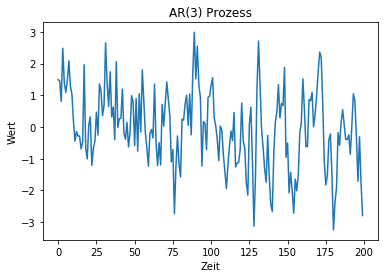

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
%matplotlib inline
ar1 = np.array([1, -.5, -.1, .1])

simulated_data = ArmaProcess(ar1, ma=[1]).generate_sample(nsample=200)

plt.plot(simulated_data)

plt.xlabel("Zeit")
plt.ylabel("Wert")
plt.title("AR(3) Prozess")

plt.show()

Obige Abbildung zeigt eine Realisierung des im obigen Code 
implementierten stochastischen Prozesses. 


## Autokorrelation eines  $\text{AR}(p)$ Prozesses

Falls wir die Anpassung eines autoregressiven Modelles an eine 
gegebene Zeitreihe beabsichtigen, so müssen wir zwei Dinge vorher klären:

(i) Ist das autoregressive Modell die richtige Wahl für diese Daten?

(ii) Welches ist die geeignete Modellordung $ p $ für die gegebenen Daten?

Eine gute Orientierungshilfe, um diese beiden Fragen zu beantworten, besteht darin, die  Autokorrelation des Prozesses zu betrachten. In diesem Kapitel werden wir deswegen die theoretische Form der Autokorrelation von $\text{AR}(p)$  Prozessen untersuchen.

In der Praxis wird die empirische Autokorrelation einer gegebenen Zeitreihe berechnet und mit der theoretischen verglichen. Auf diese Weise können wir beurteilen, ob eine Zeitreihe autoregressiv ist und wenn ja, welche Modellordnung sie hat. 

## Beispiel : Autokorrelation eines $ \text{AR}(1) $ Prozesses

Wir betrachten den $\text{AR}(1)$ Prozess  mit $|a_1|<1$ und berechnen die Autokorrelation mit lag $h=1$

\begin{align*}
\rho(1) 
&= \frac{Cov(X_n, X_{n-1})}{\gamma(0)}\\
& = \frac{Cov(a_1 X_{n-1} + W_{n}, X_{n-1})}{\gamma(0)}\\ 
&= \frac{a_1 Cov(X_{n-1}, X_{n-1}) + Cov(W_{n}, X_{n-1})}{\gamma(0)}\\
& = \frac{a_1 \gamma(0)}{\gamma(0)}\\
& = a_1
\end{align*}

Die Autokorrelation mit  lag $h=2$ können wir nun berechnen durch

\begin{align*}
\rho(2) 
&= \frac{Cov(X_n, X_{n-2})}{\gamma(0)} \\ 
&= \frac{a_1 Cov(X_{n-1}, X_{n-2})+ Cov(W_{n-1}, X_{n-1})}{\gamma(0)}\\
& = a_1 \gamma(1)\\
& = a_1^2
\end{align*}

Fahren wir auf diese Weise fort, so erhalten wir

$$
\rho(h) 
= a_1^h
$$

Dies läuft darauf hinaus, das die Autokorrelation des $ \text{AR}(1) $ Prozesses exponentiell schnell zerfällt. 

Die Berechnung der Autokorrelation eines allgemeinen $ \text{AR}(p) $ Prozesses ist ziemlich kompliziert für $ p>1 $. Diese Berechnung übernimmt Python mit dem Befehl _ArmaProcess(ar = [...]).acf()_. Man beachte, dass bei  _ar = [...]_ die Koeffizienten des charakteristischen Polynoms eingegeben werden müssen. 


## Beispiel : $\text{AR}(3)$ Prozess

Wir untersuchen den $\ AR(3)$ Prozess: 

$$ X_n = 0.5 X_{n-1} - 0.5 X_{n-2} - 0.1 X_{n-3} + W_n $$

Dieser Prozess ist definiert durch die Koeffizienten $a_1 = 0.5$, $a_2= -0.5$ and $a_3 = -0.1$.

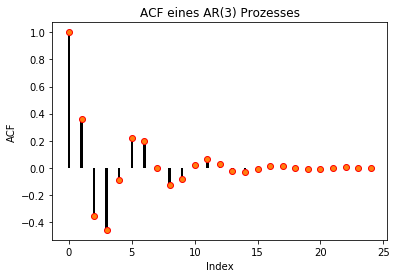

In [5]:
from statsmodels.tsa.arima_process import ArmaProcess

lag = 25

acf_theor =ArmaProcess(ar = [1, -.5, .5, .1], ma=[1]).acf(lag)

x = np.arange(lag)
plt.bar(x, acf_theor , width=.2, color="black")
plt.plot(x, acf_theor, "ro", markerfacecolor="C1")

plt.xlabel("Index")
plt.ylabel("ACF")
plt.title("ACF eines AR(3) Prozesses")

plt.show()

Die obere Funktion ist wahrscheinlich ein autoregressiver Prozess 

Wie aus obiger Abbildung zu erkennen ist, 
oszilliert die Autokorrelation eines gegebenen $ \text{AR}(3) $ 
und nimmt im Wesentlichen exponentiell ab. Dies ist das typische Muster der Autokorrelationsfunktion im Falle von autoregressiven Prozessen. 


Das Beispiel oben deutet an, dass die Autokorrelation eines $ \text{AR}(p) $ Prozesses nicht 0 ist für eine grosse Spannweite von lags. Dies ist wegen der Verbreitung von Korrelation durch das Modell: Falls $ X_{k} $ stark mit $ X_{k+1} $ korreliert und $ X_{k+1} $ stark mit $ X_{k+2} $ korreliert, dann ist es wahrscheinlich, dass $ X_{k} $ auch stark mit $ X_{k+2} $ korreliert. 

Falls wir die _direkte_ Korrelation zwischen $ X_{k} $ und $ X_{k+2} $ untersuchen wollen, also insbesondere den Anteil der Korrelation, der _nicht_ aufgrund von $ X_{k+1} $ zu Stande kommt, dann müssen wir die partielle Autokorrelation berechnen. Die exakte mathematische Definition lautet wie folgt:

Für einen schwach stationären stochastischen Prozess $\{X_1,X_2,\dots\}$ ist die  partielle Autokorrelation  definiert durch

$$ \pi(h) = Cor(X_k, X_{k+h}\mid X_{k+1},\dots, X_{k+h-1}) $$

Die Grösse $Cor(X,Y\mid Z)$ beschreibt die bedingte Korrelation von  $X$ und $Y$ unter der Bedingung, dass der Wert von  $Z$ gegeben ist.

Wir erwähnen aber, dass für einen autoregressiven Prozess $ \text{AR}(p) $ die partielle Autokorrelation zwei wichtige Eigenschaften hat. 


(i) Der $ p $-te Koeffizient $ \alpha_{p} $ eines $ \text{AR}(p) $ Prozesses ist gleich $ \pi(p) $, also insbesondere der Wert der partiellen Autokorrelation bei lag $ p $ des Prozesses. 

(ii) Für einen autoregressiven Prozess $ \text{AR}(p) $ ist die partielle Autokorrelation 0 für lags grösser als $ p $. Insbesondere $ \pi(k)=0 $ für $ k>p $. 


# partielle Autokorrelation
Mit diesen Eigenschaften haben wir ein Werkzeug zu Verfügung, um  gegebene autoregressive Zeitreihen zu untersuchen und die Modellordnung zu bestimmen. Wir berechnen dazu die partielle Autokorrelation und wählen den grössten lag $ k $, für welches der Wert $ \pi(k) $  nicht 0 ist. In Python wird die partielle Autokorrelation einer stationären Zeitreihe geschätzt durch den Befehl _ArmaProcess(...).pacf()_.

## Beispiel : $\text{AR}(3)$ Prozess

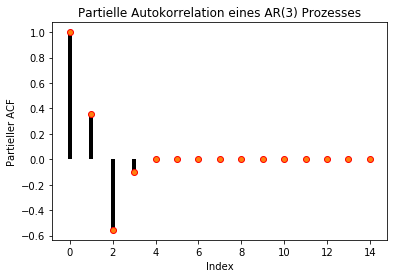

In [15]:
from statsmodels.tsa.arima_process import ArmaProcess

lag=15

pacf_theor =ArmaProcess(ar= [1, -.5, .5, .1], ma=[1]).pacf(lag)

x = np.arange(lag)
plt.bar(x, pacf_theor, width=.2, color="black")
plt.plot(x, pacf_theor, "ro", markerfacecolor="C1")

plt.xlabel("Index")
plt.ylabel("Partieller ACF")
plt.title("Partielle Autokorrelation eines AR(3) Prozesses")

plt.show()

Ab lag 4 ist es null, also modeliere ich es mit einem mit einem Model dritter ordnung ->
 die Paramter kann man aus dem Diagram auslesen

Wie aus obiger Abbildung ersichtlich ist, sind die Koeffizienten der partiellen Autokorrelation grösser als $ 3 $ beinahe $0$. In der Praxis, insbesondere wenn wir nur die beobachtete Zeitreihe haben, wählen wir ein autoregressives Modell der Ordnung $ 3 $ für die Modellierung der gegenwärtigen Reihe.

## Beispiel : Sunspots

Die Vorhersage von Sonnenaktivität ist wichtig für den satellite drag (Reibungskräfte der Restatmosphäre), Ausfall von Telekommunikation und Solarwinde im Zusammenhang mit Blackouts von Kraftwerken. Ein Indikator von Sonnenaktivität sind unter anderem die Zahl der Sonnenflecken

Im Datensatz _sunspot_, der in _statsmodels_ integriert ist, sind die Anzahl Sonnenflecken von 1700 bis 2008 jährlich aufgeführt. 

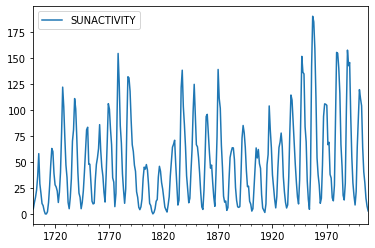

In [7]:
import statsmodels.api as sm
import pandas as pd

dta = sm.datasets.sunspots.load_pandas().data

dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

dta.plot()

plt.show()

Es ist wichtig zu bemerken, dass die Sonnefleckendaten _nicht_ periodisch sind, insbesondere sind die Zyklenlängen nicht konstant. Dieses quasiperiodisches Verhalten dürfen wir nicht mit  Saisonalität verwechseln. Die Peaks und Minimas sind im Vornherein _nicht_ bekannt. 

### Box-Cox Transformation

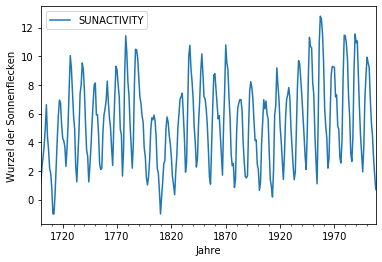

In [8]:
dta_sq = (np.sqrt(dta)-1)

dta_sq.plot()

plt.xlabel("Jahre")
plt.ylabel("Wurzel der Sonnenflecken")

plt.show()

Als nächstes berechnen wird die Autokorrelations- und partielle Autokorrelationsfunktion, um zu klären, ob das autoregressive Modell die richtige Modellwahl ist und  falls ja, um die richtige Ordnung des Modelles zu bestimmen. 

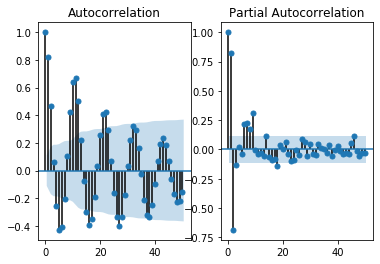

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure()

ax1 = fig.add_subplot(121)
plot_acf(dta_sq,lags=50, ax=ax1)

ax2 = fig.add_subplot(122)
plot_pacf(dta_sq,lags=50,ax=ax2)

plt.show()

In obiger Abbildung ist links die Autokorrelation und rechts die partielle Autokorrelation aufgeführt. Wie man sieht, zeigt die Autokorrelation typisches Verhalten für einen autoregressiven Prozess: ein oszillierendes Muster mit exponentiellem Verfall. 

Die partielle Autokorrelation zeigt, dass  die direkte Abhängigkeit einen maximalen lag 9 hat. Dies wählen wir als Modellparameter $ p $ im nächsten Abschnitt.

# Anpassung der Koeffizienten in einem $\text{AR}(p)$ Modell

Wir wenden uns nun der Parameterschätzung zu. Dazu gehen wir nicht 
allzu sehr ins Detail, sondern erwähnen bloss den grundlegendsten 
Ansatz, um die Koeffizienten zu sch\"atzen, nämlich die Methode der 
kleinsten Quadrate. Gegeben sind die Daten $\{x_1,x_2,\dots, x_n\}$ 
und ein Modell der Ordnung $ p $. Wir passen den $\text{AR}(p)$ Prozess 
an die Daten an, indem wir das folgende lineare Gleichungssystem l\"osen:

\begin{align*}
x_{p+1} & = a_1 x_p + a_2 x_{p-1} + \dots + a_p x_{1} + W_{p+1} \\
x_{p+2} & = a_1 x_{p+1} + a_2 x_{p} + \dots + a_p x_{2} + W_{p+2} \\
\vdots & \\
x_{n} & = a_1 x_{n-1} + a_2 x_{n-2} + \dots + a_p x_{n-p} + W_{n} \\
\end{align*}

Dieses System wird im Sinne der Methode der kleinsten Quadrate gelöst. 

Es gibt mindestens drei weitere Methoden, die Standard sind, um die 
Koeffizienten von $\text{AR}(p)$ zu schätzen : 
(i)    Burg's Algorithmus
(ii)   Yule-Walker Gleichungen
(iii)  Maximum Likelihood Methode
Mehr dazu steht im Vorlesungsskript.

### Beispiel : Sunspots

Wir wollen nun das Modell an die Daten anpassen.

In [10]:
from statsmodels.tsa.arima_model import ARMA 

model = ARMA(dta_sq, order=(9,0)).fit()

/home/florianbaer/src/HSLU/STAT/STAT/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


Die Option _order=(9,0)_ erreicht, dass die Ordnung der Anpassung 9. Ordnung ist.

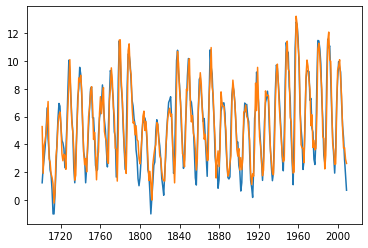

In [11]:
plt.plot(dta_sq)
plt.plot(dta_sq["SUNACTIVITY"] - model.resid)

plt.show()

Obige Abbildung zeigt die jährlich gemittelte Zeitreihe in blau und den Output des Modelles in orange. Die Anpassung scheint eingermassen genau zu sein.

Allerdings sollten wir noch den Residuenplot überprüfen. Wir wählen ein Histogramm und ein qq-Plot.

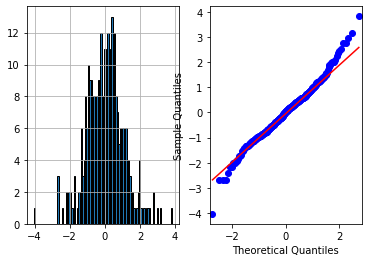

In [12]:
from statsmodels.graphics.api import qqplot

fig = plt.figure()

ax1 = fig.add_subplot(121)
model.resid.hist(edgecolor="black", bins=100, ax=ax1)

ax2 = fig.add_subplot(122)
qqplot(model.resid,  line="q", ax=ax2)

plt.show()

## Vorhersagen von  $\text{AR}(p)$ Prozessen

Am Ende wollen wir natürlich mit unserem Modell 
zuk\"unftige (unbeobachtete) Werte vorhersagen.  
Die allgemeine Vorgehensweise, um stationäre 
Zeitreihen mit Hilfe eines autoregressiven Modells vorherzusagen, 
lässt sich wie folgt zusammenfassen:

Unter der Annahme, dass $\{X_1,X_2,\dots,\}$ ein stationärer 
Prozess ist und wir die Zeitreihe $\{x_1,x_2,\dots, x_n\}$ beobachtet 
haben:  Die Vorhersage für den $k$-ten Schritt im voraus
ist eine Schätzung der Zufallvariable $X_{n+k}$ gegeben durch


$$
\hat{X}_{n+k} 
= \text{E}(X_{n+k} \mid X_1 = x_1,\dots, X_n = x_n)
$$


Hier ist $\text{E}(X\mid Y=y)$ die bedingte Wahrscheinlichkeit 
des Erwartungswertes $X$ unter der Bedingung, dass $Y=y$.

In Python können Vorhersagen einer Zeitreihe mit dem Attribut 
_predict_ ausgeführt werden.

### Beispiel $\text{AR}(1)$ Prozess

Im Folgenden simulieren wir Zeitreihen, die auf einem $ \text{AR}(1) $ Prozess 
beruhen und wollen einige zukünftige Werte aufgrund dieser Zeitreihendaten 
voraussagen. Dazu bilden wir ein Modell aufgrund einer Teilmenge dieser 
erzeugten Daten. Das heisst, wir schneiden einige Werte am Ende der Zeitreihe ab, 
die wir dann vorhersagen und untersuchen möchten.

/home/florianbaer/src/HSLU/STAT/STAT/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  if __name__ == '__main__':


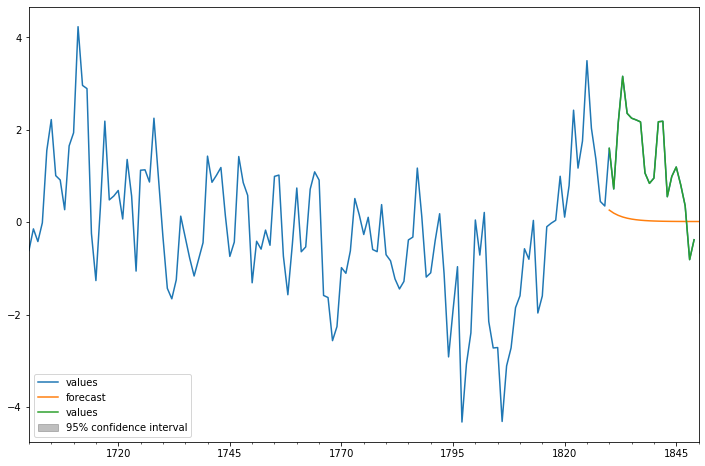

In [13]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from pandas import Series
from pandas import DataFrame
ar = np.array([1, -0.7])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = DataFrame({'values' : AR_object.generate_sample(nsample=150)})
simulated_data.index = pd.DatetimeIndex(start='1700', end='1850', freq='A')
mod = ARMA(simulated_data, order=(1,0)).fit()
fig, ax = plt.subplots(figsize=(12, 8))
ax = simulated_data.loc['1700':].plot(ax=ax)
mod.plot_predict('1830','1850', dynamic=True, ax=ax, plot_insample=True);
plt.show()

Obige Abbildung  zeigt die vollständigen Daten (blau, grün). Aus diesen Daten wird ein $ \text{AR}(1) $ Modell gebildet und die Werte für die restlichen 20 Werte vorhergesagt (orange). Auch eingezeichnet sind die Grenzen des Vertrauensintervall (grau).

## Vertrauensintervall für Vorhersagen

Der Standardfehler   $\sigma_k$, der hier angegeben ist, ist die Quadratwurzel 
der bedingten Varianz

$$ 
\sigma_k^2 
= \text{Var}(X_{n+k}\mid X_1=x_1,\dots, X_n = x_n)
$$

Diese Grösse nimmt mit $ k $ zu und konvergiert gegen 
die Prozessvarianz $\sigma_X^2$. Mit diesem Standardfehler 
können wir ein 95\% Vertrauensintervall für 
den bedingten Erwartungswert  $\text{E}(X_{n+k}\mid X_1 = x_1, \dots, X_n = x_n)$ berechnen

$$ \hat{X}_{n+k} \pm 1.96 \sigma_k $$

Wir wollen noch bemerken, dass in der Praxis sowohl der Standardfehler, 

Das Beispiel oben deutet an, dass die $ \text{AR}(1) $ Vorhersagen sehr grob sind: Sie beginnen bei der letzten Beobachtung und gehen exponentiell gegen 0. Dies überrascht nicht, da alle zukünftigen Vorhersagen nur vom letzten beobachteten Wert abhängen.

### Beispiel : Sonnenflecken

Wir betrachten nochmals das Beispiel der Sonnenflecken. Wir verwenden die jährlichen Daten von 1749 bis 1989 als 
Trainingsdaten und schätzen das $ \text{AR}(9) $ Modell aus diesen Daten. Dann sagen wir die Sonnenfleckenzahlen für die nächsten 25 Jahre voraus. 

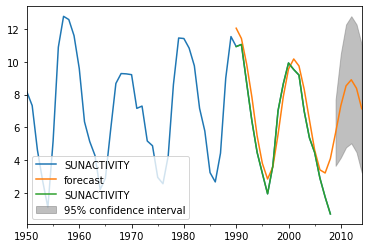

In [14]:
fig, ax = plt.subplots()
ax = dta_sq.loc['1950':].plot(ax=ax)

fig = model.plot_predict('1990', '2014', dynamic=True, ax=ax, plot_insample=True)

plt.show()